In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


this notebook has the answers for Question 2, part 1-3 (answers for all the sub questions are somewhere in this stupid notebook)

In [ ]:
import pandas as pd

data2 = pd.read_csv('/content/drive/MyDrive/509 assessment 2/Q3/D2.csv')

In [ ]:
data2.head()

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive
0,male,30_40,174,64,bp,yes,med,white,native,never,3.0132,7.725594,2.0,never,4,1
1,male,30_40,182,118,unknown,yes,med,white,native,never,0.0000,7.725594,3.0,never,4,1
2,male,30_40,184,118,unknown,yes,med,white,native,never,0.0000,7.725594,3.0,never,4,1
3,female,70_80,164,72,unknown,yes,med,white,native,never,14.0000,7.725594,3.0,never,4,1
4,male,30_40,192,92,unknown,yes,med,white,native,never,0.0000,7.725594,1.0,never,4,1


In [ ]:
data2.drop('immigrant', axis=1, inplace=True)
data2.drop('race', axis=1, inplace=True)
data2.drop('insurance', axis=1, inplace=True)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6110 non-null   object 
 1   age               6110 non-null   object 
 2   height            6110 non-null   int64  
 3   weight            6110 non-null   int64  
 4   blood_type        6110 non-null   object 
 5   income            6110 non-null   object 
 6   smoking           6110 non-null   object 
 7   alcohol           6110 non-null   float64
 8   contacts_count    6110 non-null   float64
 9   house_count       6110 non-null   float64
 10  working           6110 non-null   object 
 11  worried           6110 non-null   int64  
 12  covid19_positive  6110 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 620.7+ KB


In [ ]:
data2['gender'] = data2['gender'].replace('other', 'male')

In [ ]:
data_num = data2['height'] + data2['weight']

In [ ]:
num_data = data2[['height', 'weight', 'alcohol', 'contacts_count', 'house_count', 'worried', 'covid19_positive']].copy()

In [ ]:
num_data.head()

,height,weight,alcohol,contacts_count,house_count,worried,covid19_positive
0,174,64,3.0132,7.725594,2.0,4,1
1,182,118,0.0000,7.725594,3.0,4,1
2,184,118,0.0000,7.725594,3.0,4,1
3,164,72,14.0000,7.725594,3.0,4,1
4,192,92,0.0000,7.725594,1.0,4,1


In [ ]:
pip install KModes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


non normalised/numeric only solution here - KMeans (not turned to matrix)---



In [ ]:
# list to save the clusters and cost
clusters = []
inertia_vals = []


# X = df2.to_numpy()

# # scaling
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


# this whole process should take a while
for k in range(1, 15, 1):
# train clustering with the specified K
  model = KMeans(n_clusters=k, random_state=rs)
  model.fit(X)
# append model to cluster list
  clusters.append(model)
  inertia_vals.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

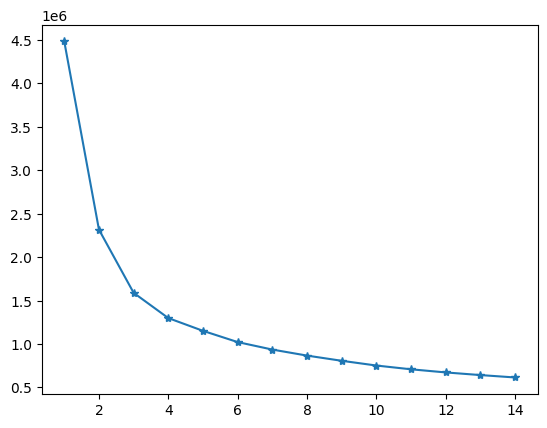

In [ ]:
#plot the inertia vs K values
plt.plot(range(1,15,1), inertia_vals, marker='*')
plt.show()

In [ ]:
clusters

[KMeans(n_clusters=1, random_state=10),
 KMeans(n_clusters=2, random_state=10),
 KMeans(n_clusters=3, random_state=10),
 KMeans(n_clusters=4, random_state=10),
 KMeans(n_clusters=5, random_state=10),
 KMeans(n_clusters=6, random_state=10),
 KMeans(n_clusters=7, random_state=10),
 KMeans(random_state=10),
 KMeans(n_clusters=9, random_state=10),
 KMeans(n_clusters=10, random_state=10),
 KMeans(n_clusters=11, random_state=10),
 KMeans(n_clusters=12, random_state=10),
 KMeans(n_clusters=13, random_state=10),
 KMeans(n_clusters=14, random_state=10)]

In [ ]:
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=2", silhouette_score(X, clusters[1].predict(X)))
print(clusters[2])
print("Silhouette score for k=3", silhouette_score(X, clusters[2].predict(X)))
print(clusters[3])
print("Silhouette score for k=4", silhouette_score(X, clusters[3].predict(X)))
print(clusters[4])
print("Silhouette score for k=5", silhouette_score(X, clusters[4].predict(X)))
print(clusters[5])
print("Silhouette score for k=6", silhouette_score(X, clusters[5].predict(X)))
print(clusters[6])
print("Silhouette score for k=7", silhouette_score(X, clusters[6].predict(X)))
print(clusters[7])
print("Silhouette score for k=8", silhouette_score(X, clusters[7].predict(X)))
print(clusters[8])
print("Silhouette score for k=9", silhouette_score(X, clusters[8].predict(X)))

KMeans(n_clusters=2, random_state=10)
Silhouette score for k=2 0.4348556338548431
KMeans(n_clusters=3, random_state=10)
Silhouette score for k=3 0.3525576675426705
KMeans(n_clusters=4, random_state=10)
Silhouette score for k=4 0.2978155735097912
KMeans(n_clusters=5, random_state=10)
Silhouette score for k=5 0.2502400794421516
KMeans(n_clusters=6, random_state=10)
Silhouette score for k=6 0.25839751637782327
KMeans(n_clusters=7, random_state=10)
Silhouette score for k=7 0.2393659867320703
KMeans(random_state=10)
Silhouette score for k=8 0.24444355682738342
KMeans(n_clusters=9, random_state=10)
Silhouette score for k=9 0.25626121612334196


In [ ]:
#k = 2 is the right number

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sum of intra-cluster distance: 2317142.9219590463
Centroid locations:
[169.39348134  72.18941899   2.98080651   7.51845532   3.02857512
   3.61147851   0.37954653]
[177.37313433 112.21748401   3.08631146   8.19309033   3.12131713
   3.66471215   0.49840085]
Cluster membership
0    4234
1    1876
Name: Cluster_ID, dtype: int64


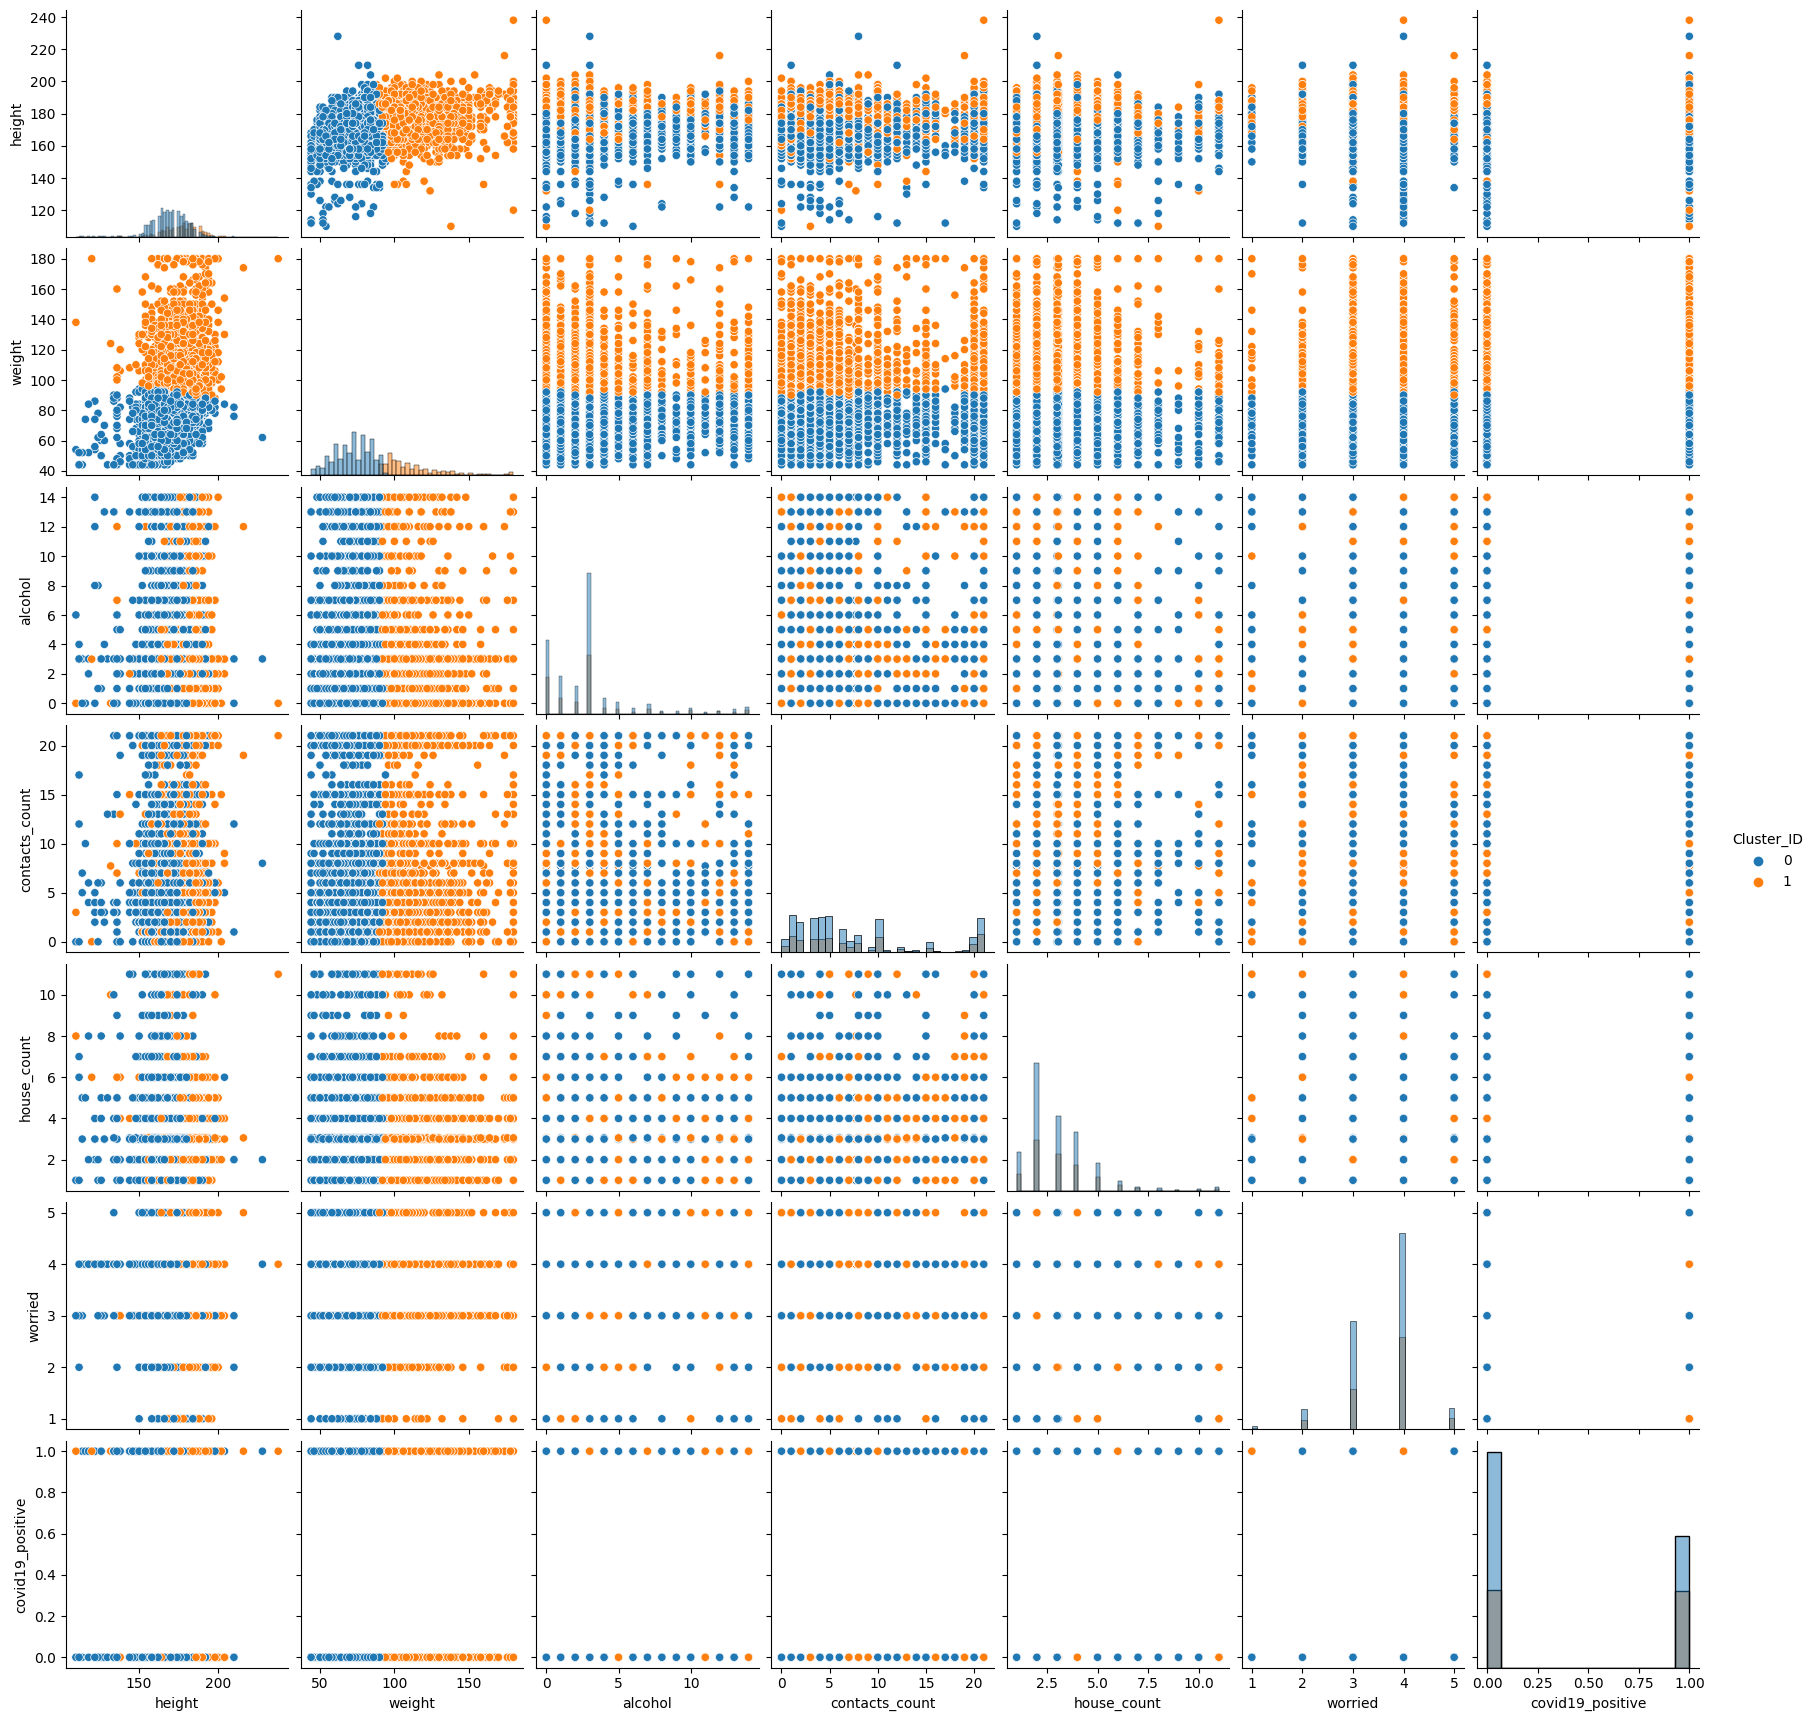

In [ ]:
import seaborn as sns
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=2, random_state=rs)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
  print(centroid)
y = model.predict(X)
num_data['Cluster_ID'] = y
# how many in each
print("Cluster membership")
print(num_data['Cluster_ID'].value_counts())
# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(num_data, hue='Cluster_ID', diag_kind='hist')
plt.show()

normalised/numeric only solution here - KMeans (turned to matrix)---

---



---




In [ ]:
import pandas as pd

data3 = pd.read_csv('/content/drive/MyDrive/509 assessment 2/Q3/D2.csv')

In [ ]:
data3.drop('immigrant', axis=1, inplace=True)
data3.drop('race', axis=1, inplace=True)
data3.drop('insurance', axis=1, inplace=True)

In [ ]:
data2['gender'] = data2['gender'].replace('other', 'male')

In [ ]:
num_data_3 = data3[['height', 'weight', 'alcohol', 'contacts_count', 'house_count', 'worried', 'covid19_positive']].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

# convert df to matrix
X3 = num_data_3.to_numpy()
# scaling
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

In [ ]:
# list to save the clusters and cost
clusters = []
inertia_vals = []
# this whole process should take a while
for k in range(1, 15, 1):
# train clustering with the specified K
  model = KMeans(n_clusters=k, random_state=rs)
  model.fit(X3)
# append model to cluster list
  clusters.append(model)
  inertia_vals.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

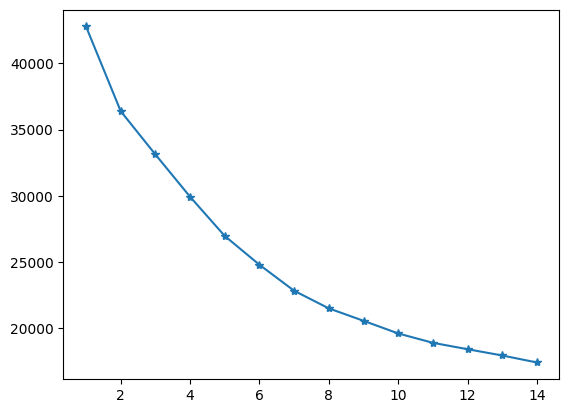

In [ ]:
#plot the inertia vs K values
plt.plot(range(1,15,1), inertia_vals, marker='*')
plt.show()

In [ ]:
clusters

[KMeans(n_clusters=1, random_state=10),
 KMeans(n_clusters=2, random_state=10),
 KMeans(n_clusters=3, random_state=10),
 KMeans(n_clusters=4, random_state=10),
 KMeans(n_clusters=5, random_state=10),
 KMeans(n_clusters=6, random_state=10),
 KMeans(n_clusters=7, random_state=10),
 KMeans(random_state=10),
 KMeans(n_clusters=9, random_state=10),
 KMeans(n_clusters=10, random_state=10),
 KMeans(n_clusters=11, random_state=10),
 KMeans(n_clusters=12, random_state=10),
 KMeans(n_clusters=13, random_state=10),
 KMeans(n_clusters=14, random_state=10)]

In [ ]:
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=2", silhouette_score(X3, clusters[1].predict(X3)))
print(clusters[2])
print("Silhouette score for k=3", silhouette_score(X3, clusters[2].predict(X3)))
print(clusters[3])
print("Silhouette score for k=4", silhouette_score(X3, clusters[3].predict(X3)))
print(clusters[4])
print("Silhouette score for k=5", silhouette_score(X3, clusters[4].predict(X3)))
print(clusters[5])
print("Silhouette score for k=6", silhouette_score(X3, clusters[5].predict(X3)))
print(clusters[6])
print("Silhouette score for k=7", silhouette_score(X3, clusters[6].predict(X3)))
print(clusters[7])
print("Silhouette score for k=8", silhouette_score(X3, clusters[7].predict(X3)))
print(clusters[8])
print("Silhouette score for k=9", silhouette_score(X3, clusters[8].predict(X3)))
print(clusters[9])
print("Silhouette score for k=10", silhouette_score(X3, clusters[9].predict(X3)))
print(clusters[10])
print("Silhouette score for k=11", silhouette_score(X3, clusters[10].predict(X3)))
print(clusters[11])
print("Silhouette score for k=12", silhouette_score(X3, clusters[11].predict(X3)))
print(clusters[12])
print("Silhouette score for k=13", silhouette_score(X3, clusters[12].predict(X3)))
print(clusters[13])
print("Silhouette score for k=14", silhouette_score(X3, clusters[13].predict(X3)))

KMeans(n_clusters=2, random_state=10)
Silhouette score for k=2 0.18186139321050243
KMeans(n_clusters=3, random_state=10)
Silhouette score for k=3 0.14521547124231723
KMeans(n_clusters=4, random_state=10)
Silhouette score for k=4 0.16116397721083967
KMeans(n_clusters=5, random_state=10)
Silhouette score for k=5 0.16545444366797166
KMeans(n_clusters=6, random_state=10)
Silhouette score for k=6 0.17341022022017474
KMeans(n_clusters=7, random_state=10)
Silhouette score for k=7 0.18668710971218244
KMeans(random_state=10)
Silhouette score for k=8 0.17087354324463208
KMeans(n_clusters=9, random_state=10)
Silhouette score for k=9 0.18152103434793737
KMeans(n_clusters=10, random_state=10)
Silhouette score for k=10 0.1754266342697283
KMeans(n_clusters=11, random_state=10)
Silhouette score for k=11 0.17399732765151774
KMeans(n_clusters=12, random_state=10)
Silhouette score for k=12 0.17260133240784092
KMeans(n_clusters=13, random_state=10)
Silhouette score for k=13 0.17352404854923303
KMeans(n_cl

In [ ]:

#k= 7 is the correct number here

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sum of intra-cluster distance: 22837.635676125894
Centroid locations:
[ 0.82687473  1.8202594  -0.22299313 -0.09110627  0.05576052  0.21810656
  0.51150752]
[ 0.20784805 -0.21311935 -0.22895271 -0.20221352 -0.19719971 -1.26756933
 -0.72627352]
[ 0.0954603   0.1178272   2.81530157 -0.10823208 -0.1734407  -0.04690928
  0.17034021]
[-0.45679847 -0.21914916 -0.03563122  0.65237564  2.96349919 -0.0920304
  0.36473821]
[-0.34482093 -0.31028401 -0.27332367 -0.50947659 -0.12116274  0.25279197
  1.18474436]
[-0.09783623 -0.28980481 -0.21633433 -0.49144896 -0.27265478  0.71077062
 -0.84406395]
[-0.15971486 -0.17613352 -0.21449282  1.85721972 -0.03100643 -0.01208157
  0.1269896 ]
Cluster membership
5    1492
4    1241
1    1154
6     819
0     669
2     448
3     287
Name: Cluster_ID, dtype: int64


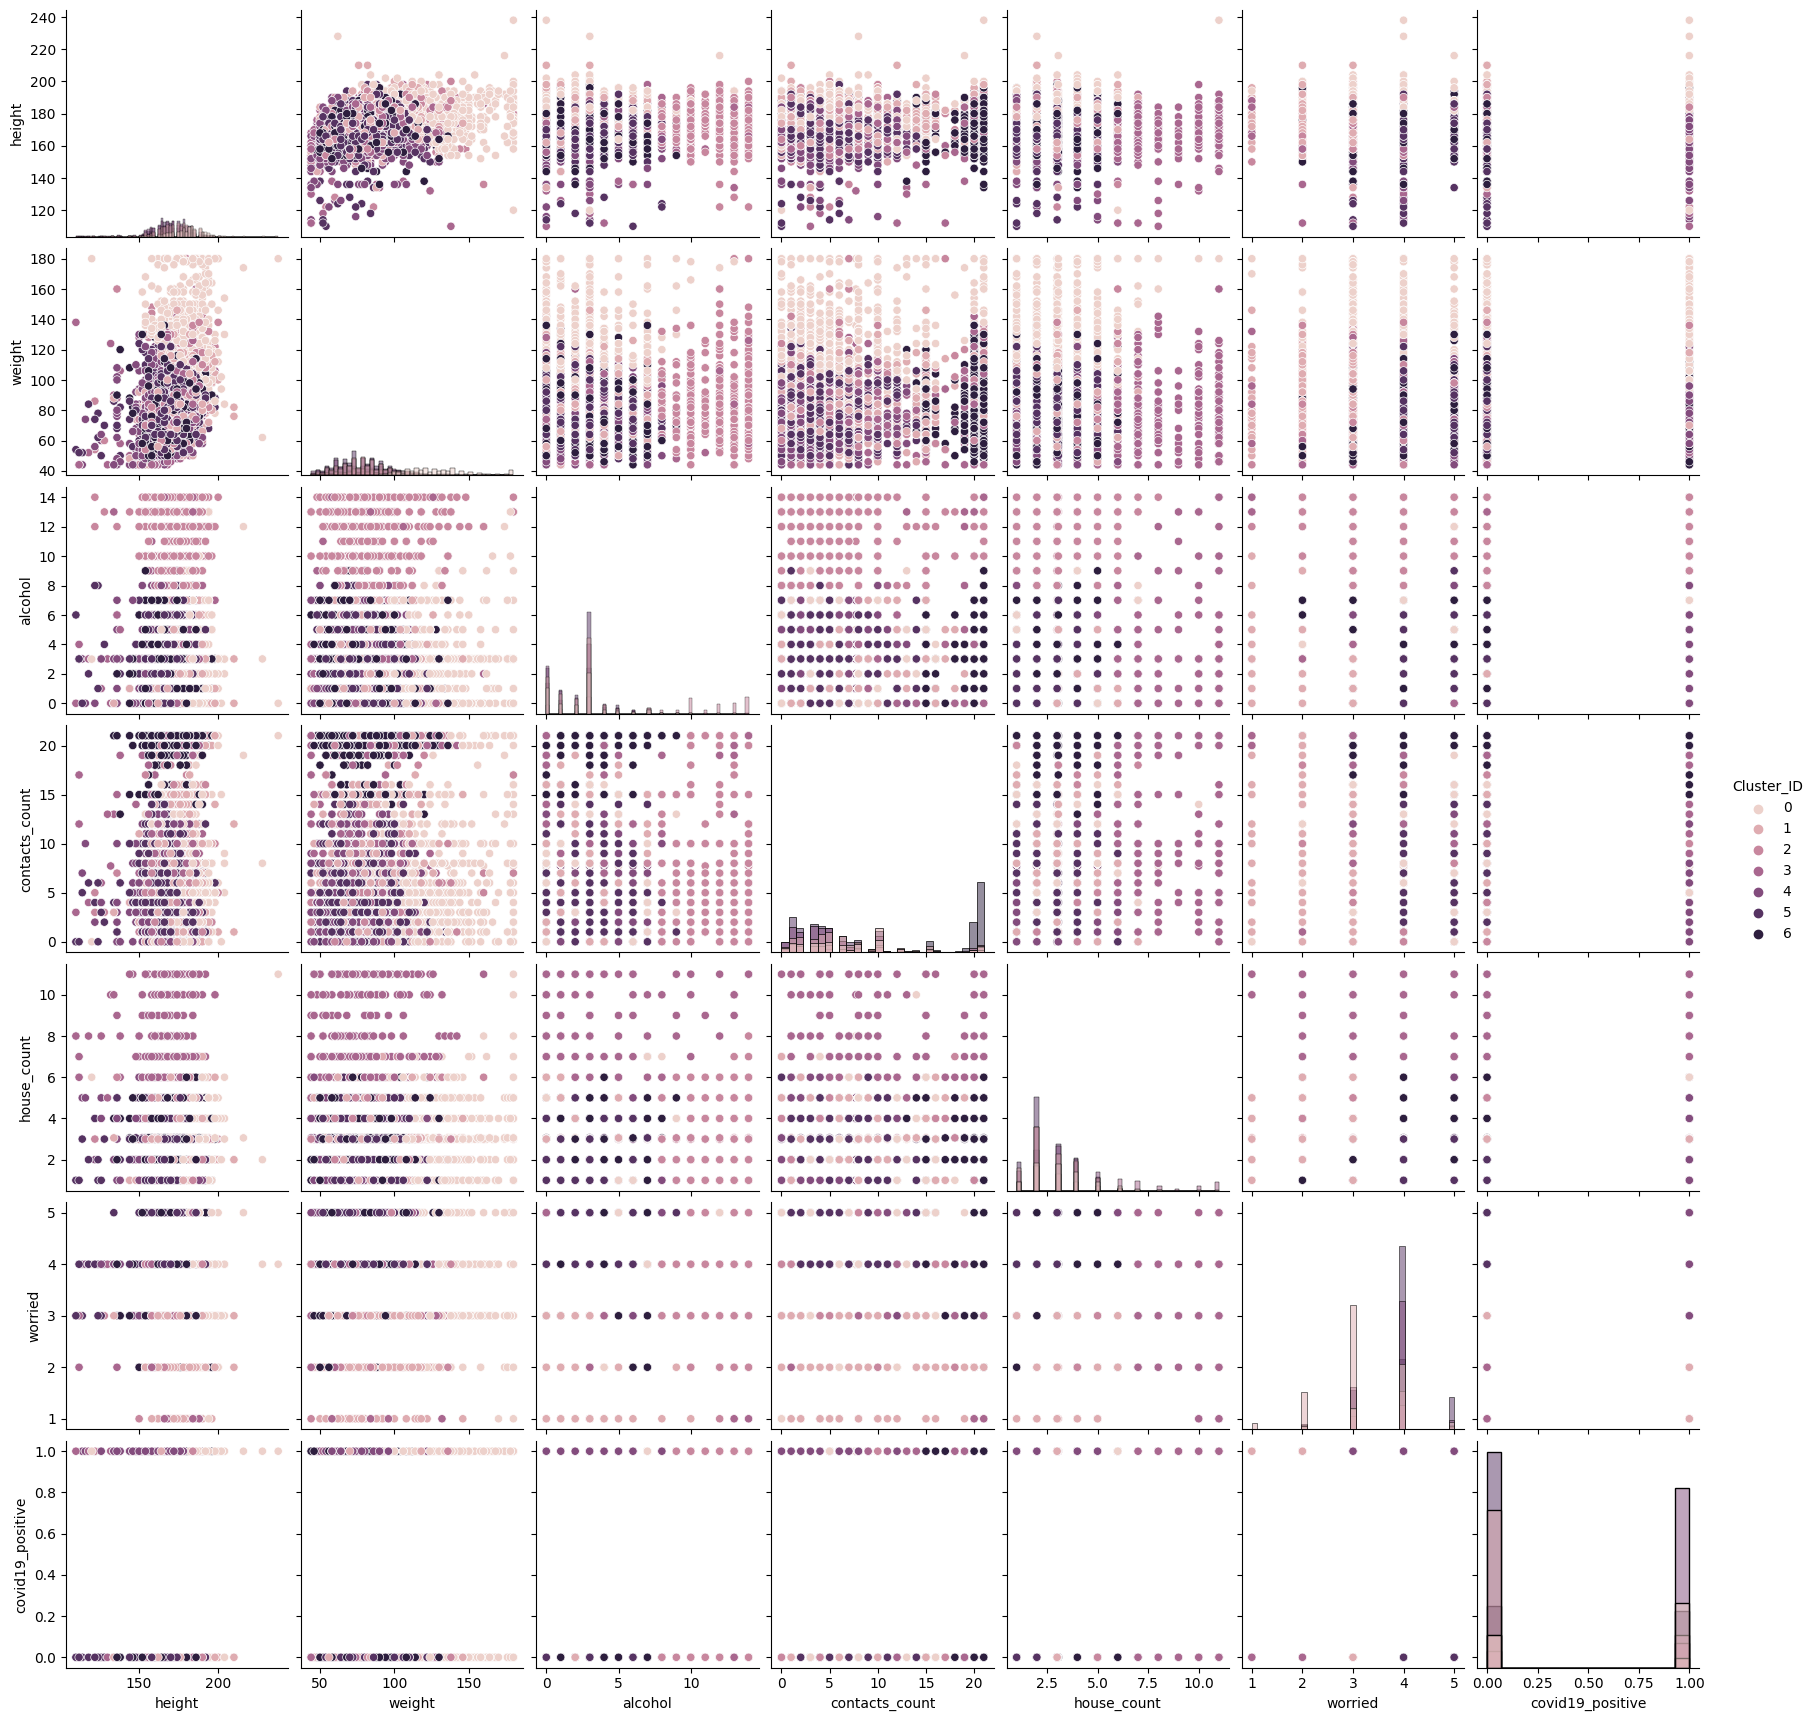

In [ ]:
import seaborn as sns
# visualisation of K=7 clustering solution
model = KMeans(n_clusters=7, random_state=rs)
model.fit(X3)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
  print(centroid)
y = model.predict(X3)
num_data_3['Cluster_ID'] = y
# how many in each
print("Cluster membership")
print(num_data['Cluster_ID'].value_counts())
# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(num_data, hue='Cluster_ID', diag_kind='hist')
plt.show()

In [ ]:
# 4,5,6 are more worries, contact counds less then worried less
# cluster 0 is higher weights
# cluster 2 higher alcohol
# cluster 3 higher house count
# cluster 5,6 house count and alcohol both low
# cluster 6 higher contacts count
# find something for cluster 1 and 4

In [ ]:
import numpy as np

# prepare the column and bin size. Increase bin size to be more specific, but 20 is more th
cols = ['height', 'weight', 'alcohol', 'contacts_count', 'house_count', 'worried', 'covid19_positive']
n_bins = 20
# inspecting cluster 1 and 6
clusters_to_inspect = [0, 1, 2, 3, 4, 5, 6]
for cluster in clusters_to_inspect:
  print("Distribution for cluster {}".format(cluster))
  # create subplots
  fig, ax = plt.subplots(nrows=7, figsize=(35,20))
  ax[0].set_title("Cluster {}".format(cluster))
  for j, col in enumerate(cols):
    # create the bins
    bins = np.linspace(min(num_data_3[col]), max(num_data_3[col]), 20)
    # plot distribution of the cluster using histogram
    sns.distplot(num_data_3[num_data_3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j]) #norm_hist=True)
    # plot the normal distribution with a black line
    sns.distplot(num_data_3[col], bins=bins, ax=ax[j], hist=False, color="k")
  plt.tight_layout()
  plt.show()  


Output hidden; open in https://colab.research.google.com to view.

NOWWWW LETSSSS INCLUDEEEE "AGEEEEE" seriosly man why the hell are these questions so long, have to use stupid kprototypes now also, stupid stupid

In [ ]:
#imma do it on a new notebook cant be bothered making things neat and tidy on this shi